In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('/content/Online Sales Data.csv')

In [ ]:
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


In [ ]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(duplicates)

0


In [ ]:
# Encode categorical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,0,3,230,2,999.99,1999.98,2,0
1,10002,1,4,59,1,499.99,499.99,1,2
2,10003,2,2,115,3,69.99,209.97,0,1
3,10004,3,1,182,4,15.99,63.96,2,0
4,10005,4,0,131,1,89.99,89.99,1,2


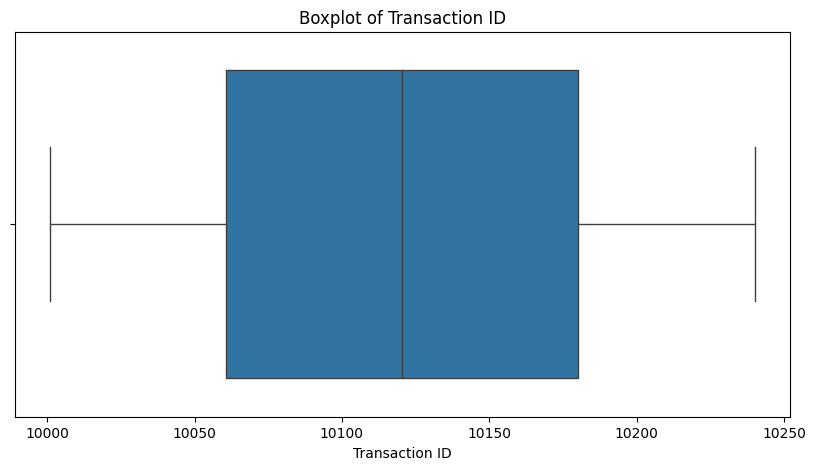

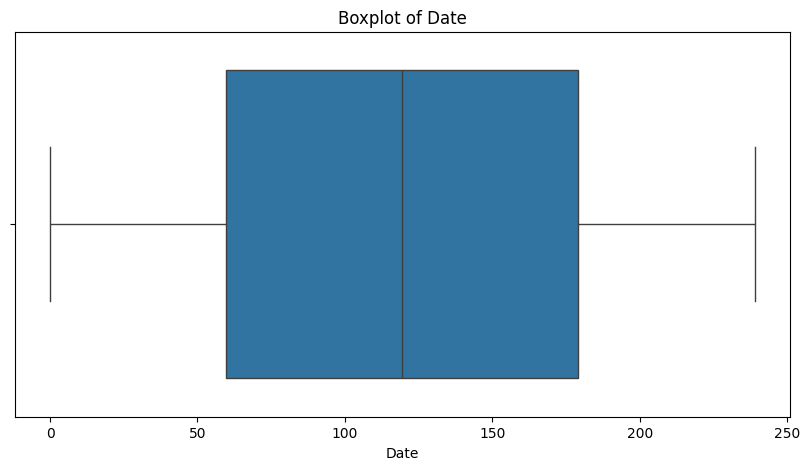

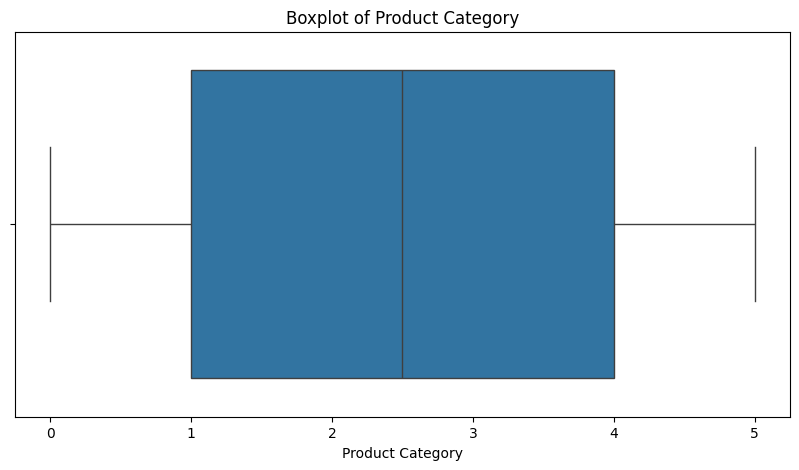

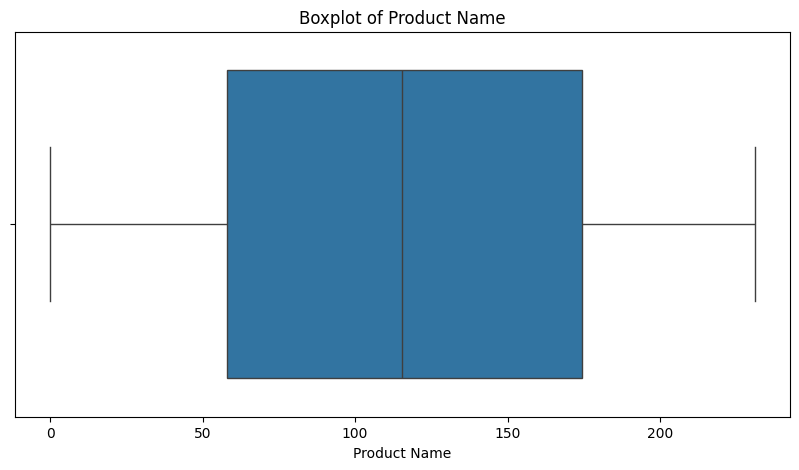

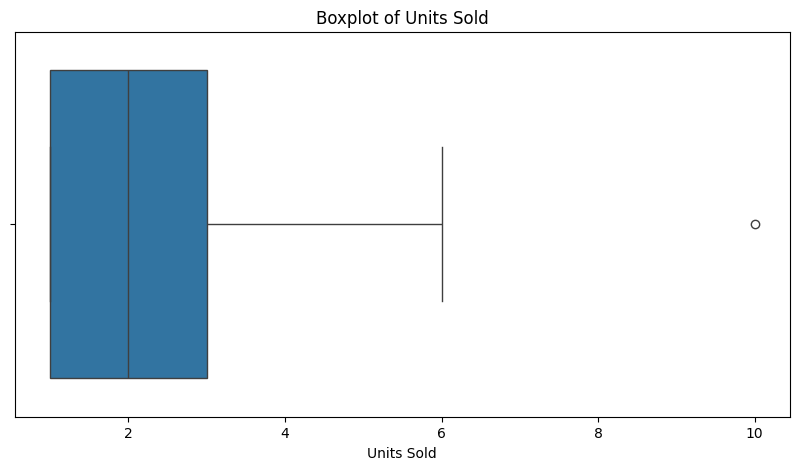

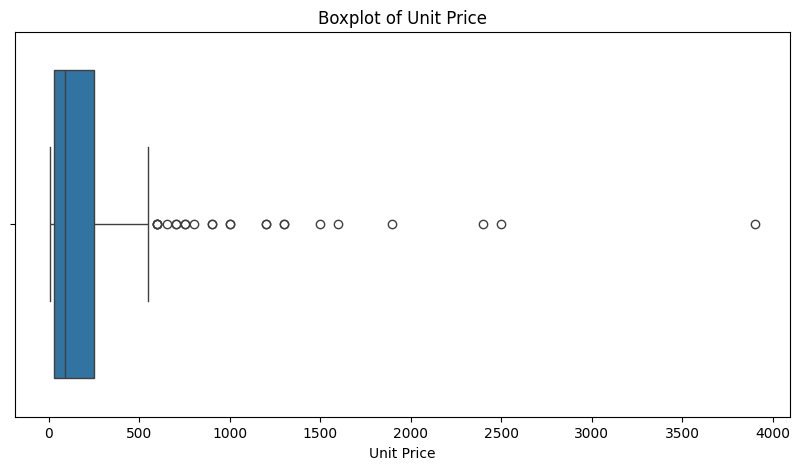

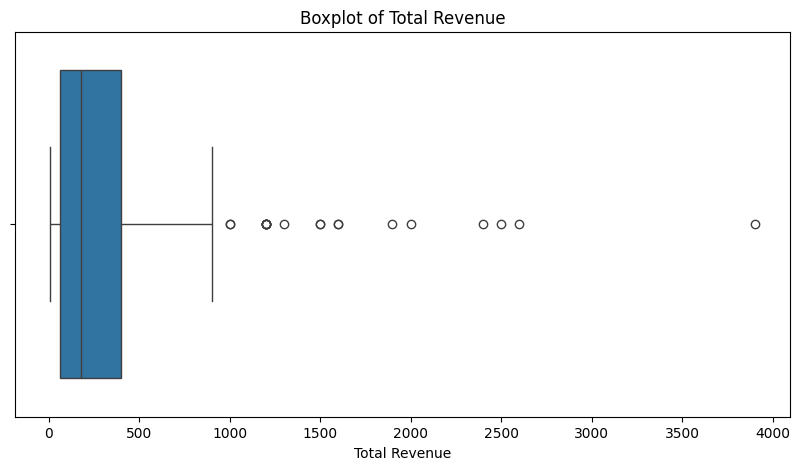

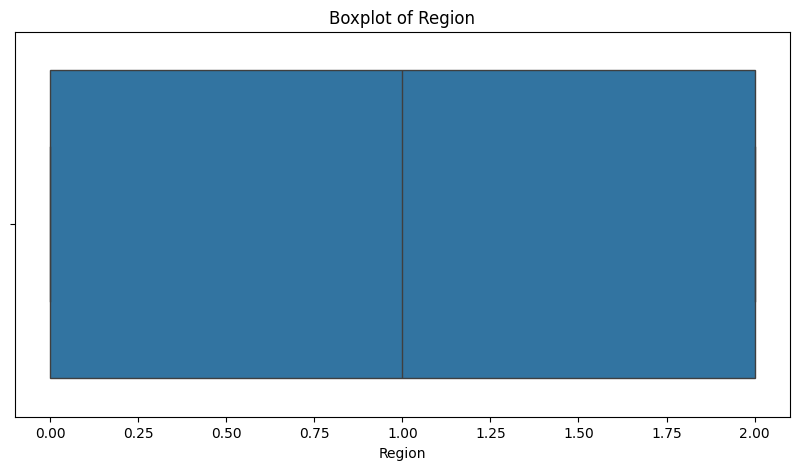

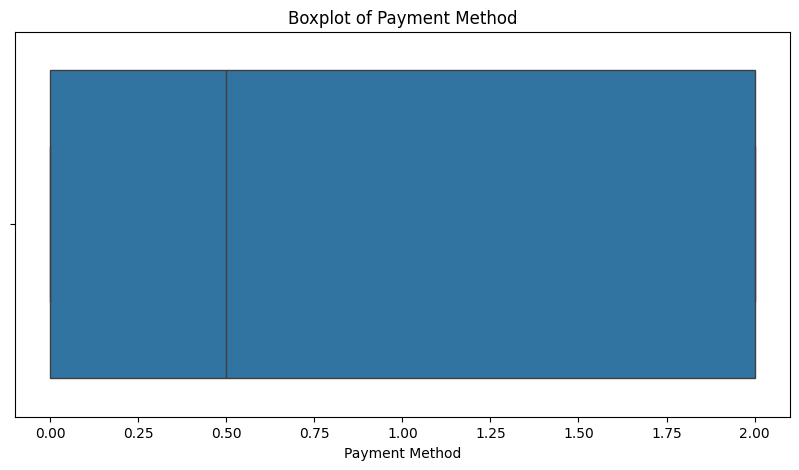

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()



In [ ]:
# Handling outliers by capping them (you can also use other methods)
for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[feature] = data[feature].clip(lower=lower_bound, upper=upper_bound)


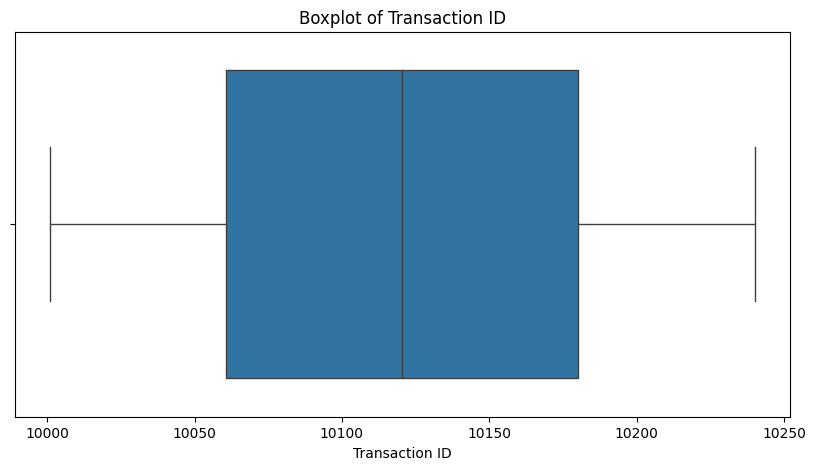

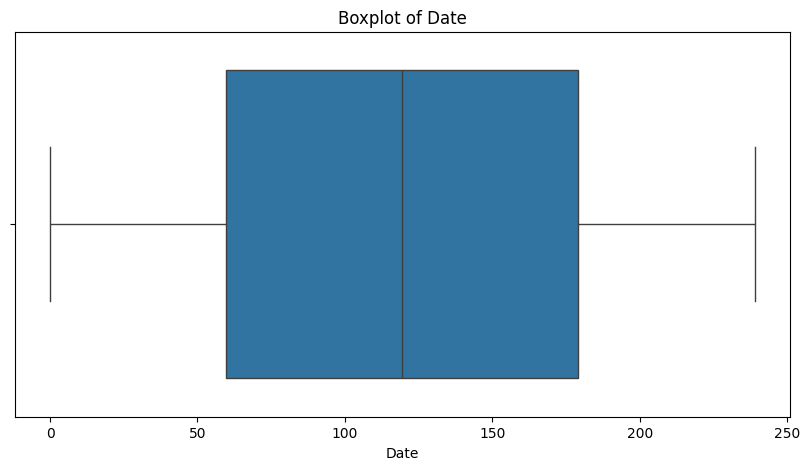

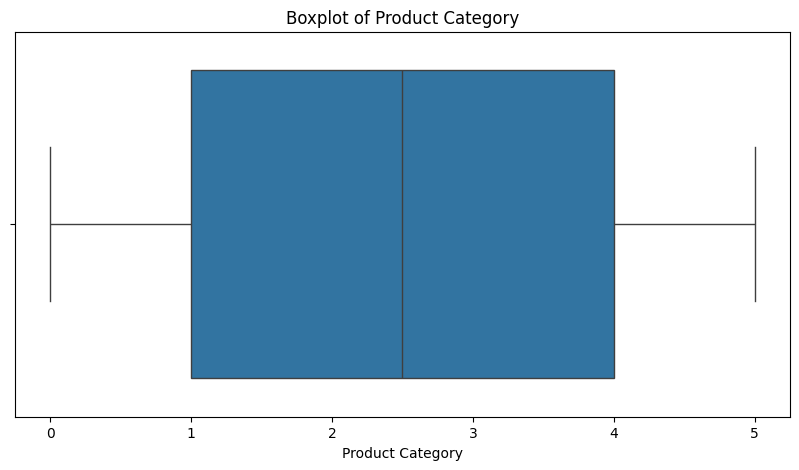

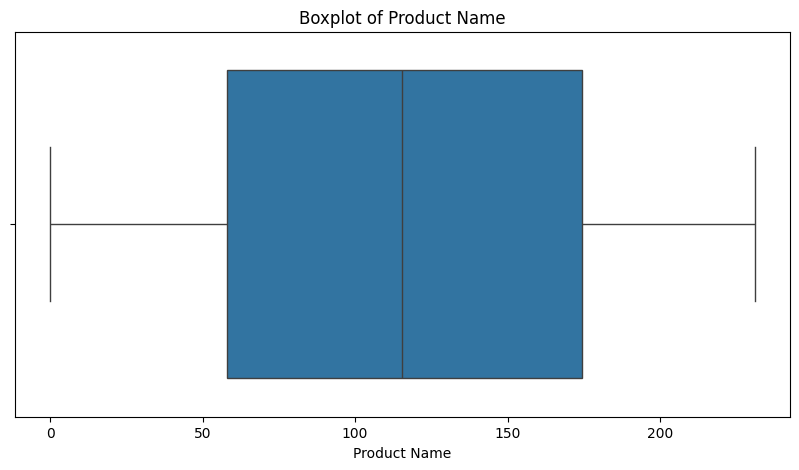

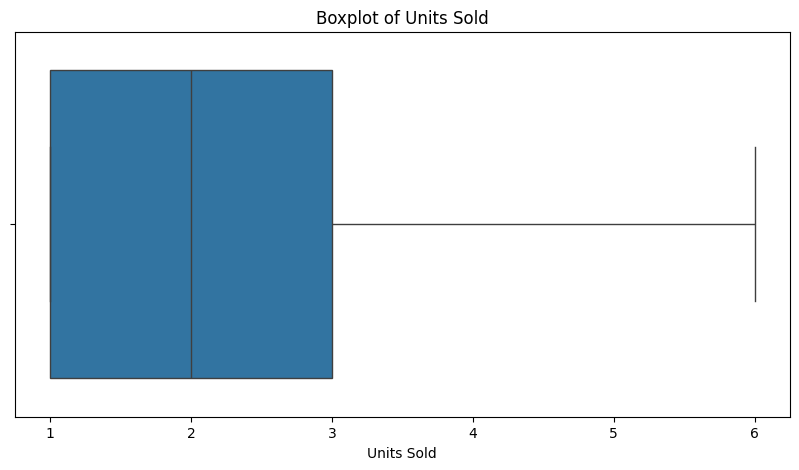

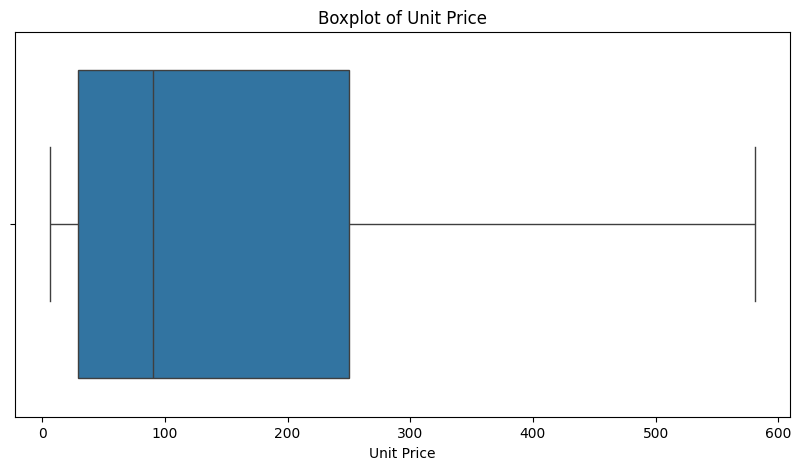

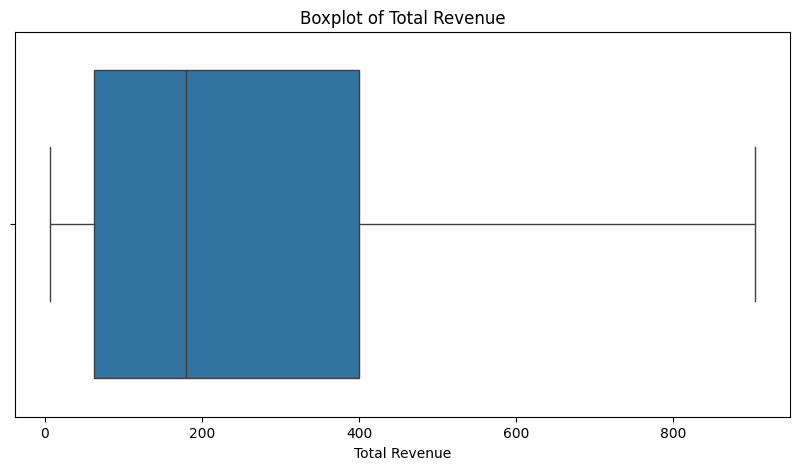

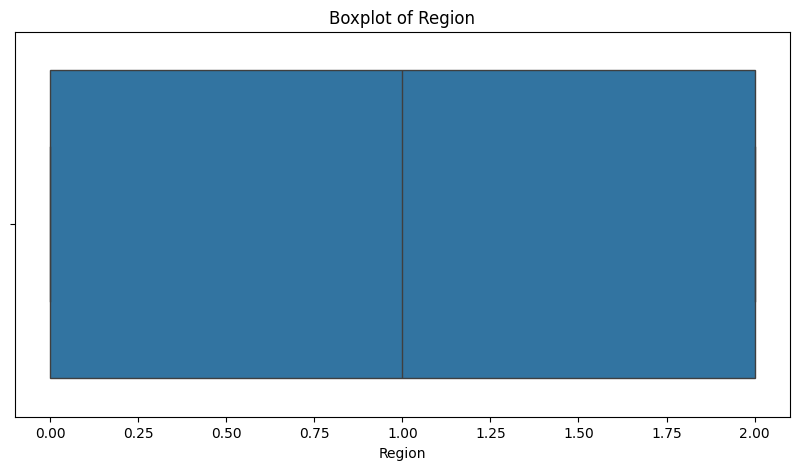

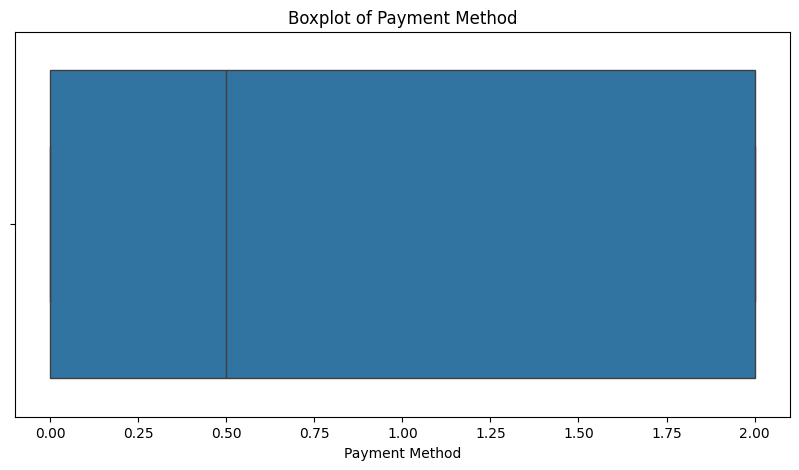

In [ ]:
# Plot boxplots for numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

#Normalize the data
scaler = StandardScaler()
data = scaler.fit_transform(data)


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Fit the DBSCAN model with different parameters
db = DBSCAN(eps=1.0, min_samples=6).fit(data)
labels = db.labels_

# Print the number of clusters and noise points
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(data, labels):.3f}")


Estimated number of clusters: 3
Estimated number of noise points: 176
Silhouette Coefficient: 0.007


In [ ]:
from sklearn.decomposition import PCA
# Reduce data to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
data_pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])

In [ ]:
from sklearn.metrics import silhouette_score
# Fit DBSCAN model
db = DBSCAN(eps=0.5, min_samples=7)
db.fit(data_pca)

# Get cluster labels
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")
print(f"Silhouette Coefficient: {silhouette_score(data_pca, labels):.3f}")



Estimated number of clusters: 4
Estimated number of noise points: 59
Silhouette Coefficient: 0.046


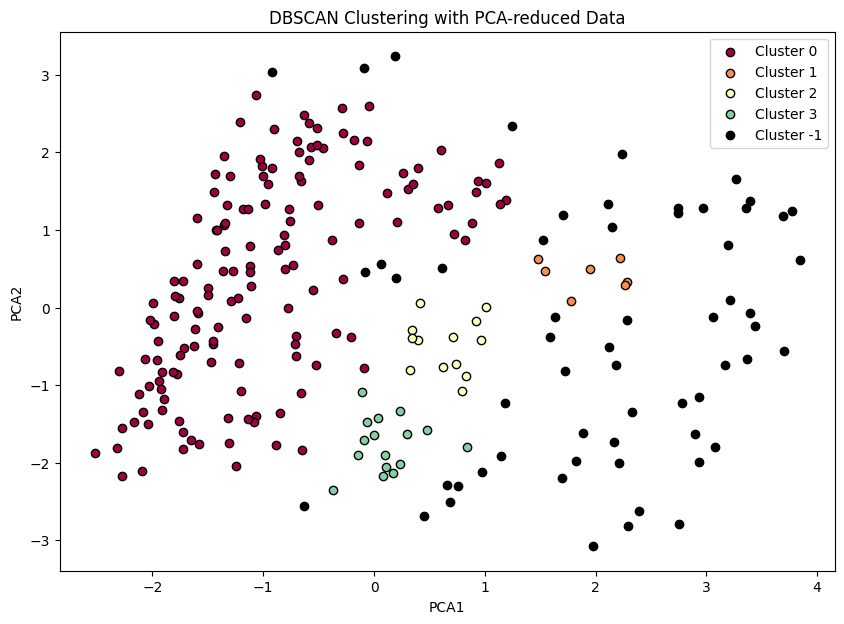

In [ ]:
# Scatter plot of the clusters
plt.figure(figsize=(10, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color is used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = data_pca[class_member_mask]

    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=f'Cluster {k}', edgecolor='k')

plt.title('DBSCAN Clustering with PCA-reduced Data')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()